Рабочая группа научного проекта, в котором я участвую, нормальный датасет мне так и не предоставила. Поэтому в Интернете был найден единственный небольшой датасет, схожий с темой наших научных изысканий и удовлетворяющий следующим условиям:
1.  задача классификации обязательно должна быть связана с медициной;
2.  необходимо, чтобы данные в датасете обязательно описывали какую-либо патологию головного мозга, относящуюся к нарушению кровообращения в головном мозге.

**0. Описание задачи.** Аневризмы — это аномальные выпячивания или вздутия стенки артерии. Они могут возникать в разных частях тела, но чаще всего встречаются в мозге (церебральные аневризмы) и аорте (аневризмы аорты). Аневризмы представляют серьезную опасность для здоровья, поскольку они могут разорваться, что приводит к сильному внутреннему кровотечению и потенциально фатальным последствиям.

Предоставленный набор данных содержит информацию о 103 пациентах с описанием различных гистоморфологических и гемодинамических характеристик аневризм.

Для каждого пацента известны 62 атрибута. Данные содержат следующую информацию о пациентах:
*   **case_id**: номер обращения за медицинской помощью;
*   **patient_id**: идентификатор пациента;
*   **aneurysmLocation**: расположение аневризмы в головном мозге;
*   **aneurysmType**: тип аневризмы;
*   **age**: возраст пациента;
*   **sex**: пол пациента;
*   **multipleAneurysms**: указывает, есть ли у пациента множественные аневризмы;
*   **ruptureStatus**: указывает, разорвалась ли аневризма или нет;
*   гемодинамические характеристики аневризмы, содержащиеся в 31 столбце таблицы: **sacVolume (объем аневризмы), sacSurfaceArea (площадь поверхности), vdcVolume (оцениваемый объем по кривым характеристик диаграммы Вороного), vdcSurfaceArea (оцениваемая площадь поверхности по кривым характеристик диаграммы Вороного), sacSectionArea (площадь сечения аневризмы), ellipsoidVolume (объем эллипсоида), ellipsoidMaxSemiaxis (максимальная полуось эллипсоида), ellipsoidMidSemiaxis, ellipsoidMinSemiaxis, sacCenterlineLength, ostiumSectionArea, ostiumSectionPerimeter, ostiumMinSize, ostiumMaxSize, ostiumShapeFactor, aspectRatio_star, sizeRatio_star, vesselDiameter, neckVesselAngle, sacVesselAngle, sacMinPressure, sacMaxPressure, sacMeanPressure, sacMaxSpeed, sacMeanSpeed, sacMinTAWSS, sacMaxTAWSS, sacMeanTAWSS, sacMinOSI, sacMaxOSI, sacMeanOSI**;
*   гистоморфологические характеристики аневризмы, содержащиеся в 23 столбцах таблицы: **vesselName (название сосуда), length (длина аневризмы), meanRadius (средний радиус), meanCurvature (среднее значение кривизны), meanTorsion (среднее кручение), tortuosity (извилистость), minRadius, maxRadius, maxCurvature, maxTorsion, bifurcationAngleInPlane, bifurcationAngleOutOfPlane, minPressure, maxPressure, meanPressure, maxSpeed, meanSpeed, minTAWSS, maxTAWSS, meanTAWSS, minOSI, maxOSI, meanOSI**.

Целевой переменной является **ruptureStatus**.


**1. Чтение данных и их первичная обработка.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('Merged_Aneurysm.csv')

In [ ]:
data.head(10)

,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.0,3722.28,70.275319,13.19376,0.31251,176.44,20.90888,0.0,0.44672,0.001574
5,C0006,P0121,ICA,LAT,U,45,F,False,166.768050,130.673128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C0007,P0126,ICA,LAT,U,44,F,True,189.890341,171.511293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C0008,P0152,ACA,TER,R,68,M,False,31.027451,42.461832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C0009,P0172,ACA,TER,R,39,F,False,92.021799,127.844372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C0010,P0173,ACA,TER,U,63,F,False,62.688596,78.796828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Переместим столбец "ruptureStatus" в конец датасета.

In [ ]:
rs = data['ruptureStatus']
data = data.drop('ruptureStatus', axis=1)
data['ruptureStatus'] = rs
data.head(10)

,case_id,patient_id,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,...,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI,ruptureStatus
0,C0001,P0085,ICA,LAT,53,F,False,125.259604,120.453515,111.237957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,C0002,P0112,ICA,LAT,35,F,False,119.002032,122.427263,113.720361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
2,C0003,P0115,ICA,TER,43,F,False,12.740609,23.480617,11.865511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,C0004,P0116,ICA,TER,60,F,True,9.376307,18.084625,9.031234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
4,C0005,P0118,ICA,LAT,26,F,False,37.934454,54.844592,35.903048,...,3722.28,70.275319,13.19376,0.31251,176.44,20.90888,0.0,0.44672,0.001574,R
5,C0006,P0121,ICA,LAT,45,F,False,166.768050,130.673128,157.934121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
6,C0007,P0126,ICA,LAT,44,F,True,189.890341,171.511293,165.537895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
7,C0008,P0152,ACA,TER,68,M,False,31.027451,42.461832,29.323896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
8,C0009,P0172,ACA,TER,39,F,False,92.021799,127.844372,55.657246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
9,C0010,P0173,ACA,TER,63,F,False,62.688596,78.796828,58.662977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


Выполним удаление столбцов, которые не оказывают влияния на результаты классификации (уникальный номер пациента и идентификатор случая обращения за медицинской помощью).

In [ ]:
data.drop(['case_id', 'patient_id'], axis=1, inplace=True)
data.shape

(103, 60)

Посмотрим основную информацию о структуре датасета.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aneurysmLocation            103 non-null    object 
 1   aneurysmType                103 non-null    object 
 2   age                         103 non-null    int64  
 3   sex                         103 non-null    object 
 4   multipleAneurysms           103 non-null    bool   
 5   sacVolume                   103 non-null    float64
 6   sacSurfaceArea              103 non-null    float64
 7   vdcVolume                   103 non-null    float64
 8   vdcSurfaceArea              103 non-null    float64
 9   sacSectionArea              103 non-null    float64
 10  ellipsoidVolume             101 non-null    float64
 11  ellipsoidMaxSemiaxis        101 non-null    float64
 12  ellipsoidMidSemiaxis        101 non-null    float64
 13  ellipsoidMinSemiaxis        101 non

**2. Визуализация данных и вычисление основных характеристик**

In [ ]:
data.describe()

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,101.000000,101.000000,101.000000,101.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000
mean,54.572816,207.726978,145.022975,187.990480,129.519595,31.697933,137.807832,3.566692,2.589285,2.221317,...,2424.087500,1037.260277,32.487594,7.452501,0.275435,55.867875,11.385739,0.0,0.326351,0.002464
std,13.779497,279.394028,133.633109,255.272818,119.365392,28.937416,193.676206,1.472732,1.174642,1.060167,...,2662.996587,1325.432582,19.659618,4.306072,0.138160,54.615555,6.329626,0.0,0.125877,0.003573
min,24.000000,2.339496,7.333407,2.121879,6.495522,1.541592,6.185859,1.489500,1.037600,0.788130,...,654.520000,241.729559,15.451824,3.402625,0.007770,16.127000,4.918505,0.0,0.129690,0.000450
25%,43.000000,38.104803,51.113444,35.284619,49.519521,10.677713,24.233485,2.461100,1.626100,1.406300,...,684.672500,286.737625,18.142043,4.103566,0.206823,21.147500,5.862933,0.0,0.236327,0.000940
50%,55.000000,92.021799,92.777085,86.406187,83.265224,20.560135,59.259143,3.178100,2.291800,1.915900,...,1094.365000,395.811790,24.567501,5.387447,0.286500,30.994000,9.686404,0.0,0.320440,0.001452
75%,64.500000,274.308487,203.174499,245.624382,176.754502,44.587280,176.432624,4.502700,3.181300,2.816300,...,2929.850000,982.220385,41.159069,11.854235,0.381758,71.851000,16.943698,0.0,0.449885,0.001702
max,85.000000,1312.025948,625.717664,1223.412403,583.439703,131.281126,944.044860,8.823800,6.038600,5.421500,...,7665.000000,3722.280000,70.275319,13.193760,0.430850,176.440000,20.908880,0.0,0.472070,0.011223




*   count — количество значений для каждого признака
*   mean — среднее значение
*   std — стандартное отклонение, значение которого показывает, на сколько в среднем отклоняются варианты от среднего значения
*   min — минимальное значение
*   25% — значения, которые объект не превышает с вероятностью 25%
*   50% — медиана, то есть значения, которые объект не превышает с вероятностью 25%
*   75% — значения, которые объект не превышает с вероятностью 75%
*   max — максимальное значение



In [ ]:
data.describe(include=['object'])

,aneurysmLocation,aneurysmType,sex,vesselName,ruptureStatus
count,103,103,103,103,103
unique,4,2,2,4,2
top,ICA,TER,F,ICA,U
freq,46,63,65,46,59


In [ ]:
data.describe(include=['bool'])

,multipleAneurysms
count,103
unique,2
top,False
freq,86


In [ ]:
data.mean(numeric_only=True)

,0
age,54.572816
multipleAneurysms,0.165049
sacVolume,207.726978
sacSurfaceArea,145.022975
vdcVolume,187.990480
vdcSurfaceArea,129.519595
sacSectionArea,31.697933
ellipsoidVolume,137.807832
ellipsoidMaxSemiaxis,3.566692
ellipsoidMidSemiaxis,2.589285


In [ ]:
data.std(numeric_only=True)

,0
age,13.779497
multipleAneurysms,0.373040
sacVolume,279.394028
sacSurfaceArea,133.633109
vdcVolume,255.272818
vdcSurfaceArea,119.365392
sacSectionArea,28.937416
ellipsoidVolume,193.676206
ellipsoidMaxSemiaxis,1.472732
ellipsoidMidSemiaxis,1.174642


Построим диаграмму, иллюстрирующую у кого чаще наблюдались разрывы аневризм, у мужчин или у женщин.

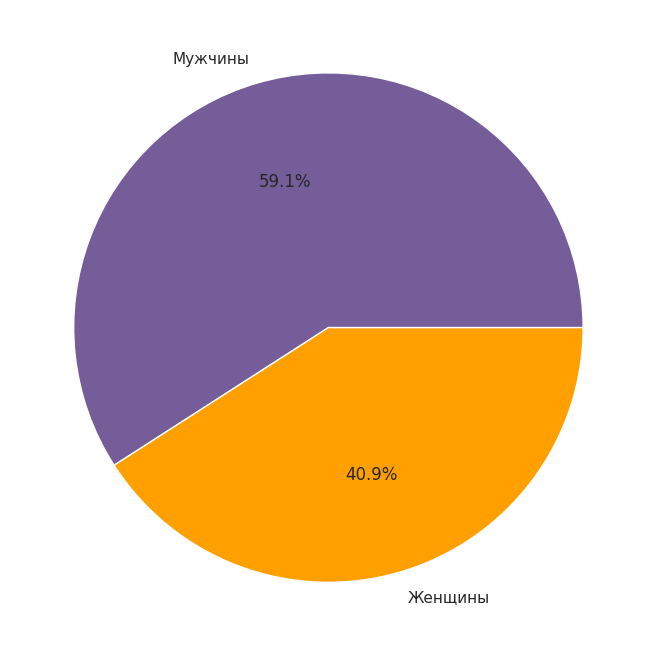

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
filtered_data = data[data['ruptureStatus'] == 'R']
gender_counts = filtered_data['sex'].value_counts()
plt.pie(gender_counts, autopct='%1.1f%%', pctdistance = 0.6, labels = ['Мужчины', 'Женщины'], colors = [(117/255,93/255,154/255), (255/255,160/255,0/255)])
pass

Разрывы аневризм чаще наблюдались у мужчин.

Построим диаграмму, иллюстрирующую зависимость разрыва аневризмы от её местоположения в головном мозге пациента.

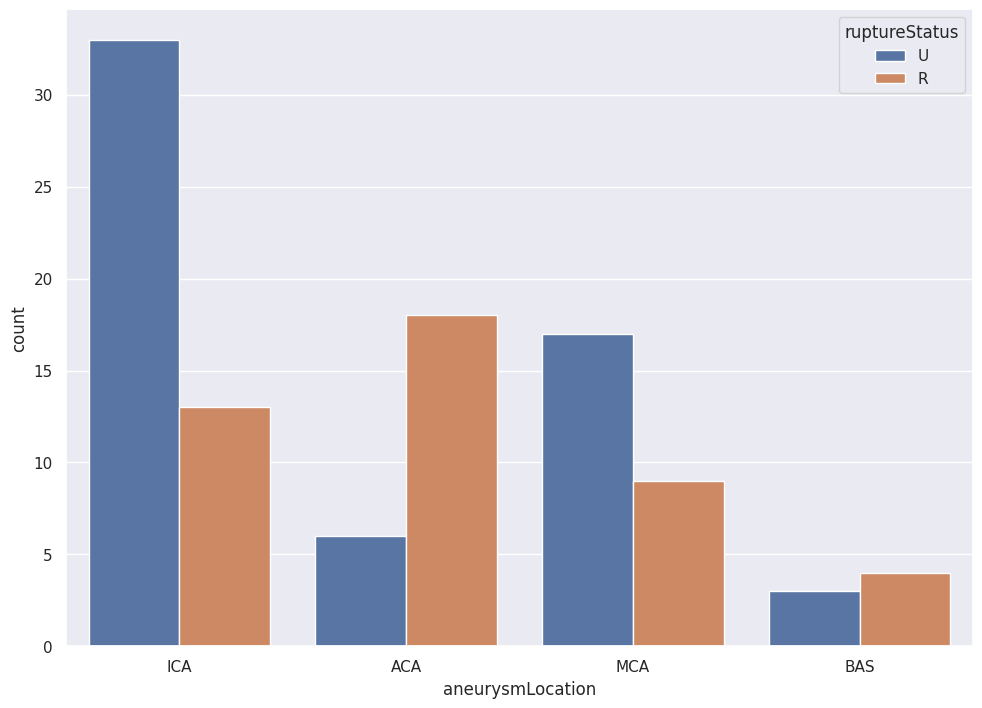

In [ ]:
sns.countplot(data=data, x='aneurysmLocation', hue='ruptureStatus')
pass

Наибольшее количество разрывов было зафиксировано в передней мозговой артерии (ACA), а наименьшее во внутренней сонной артерии (ICA).

Построим диаграмму, иллюстрирующую зависимость разрыва аневризмы от её типа.

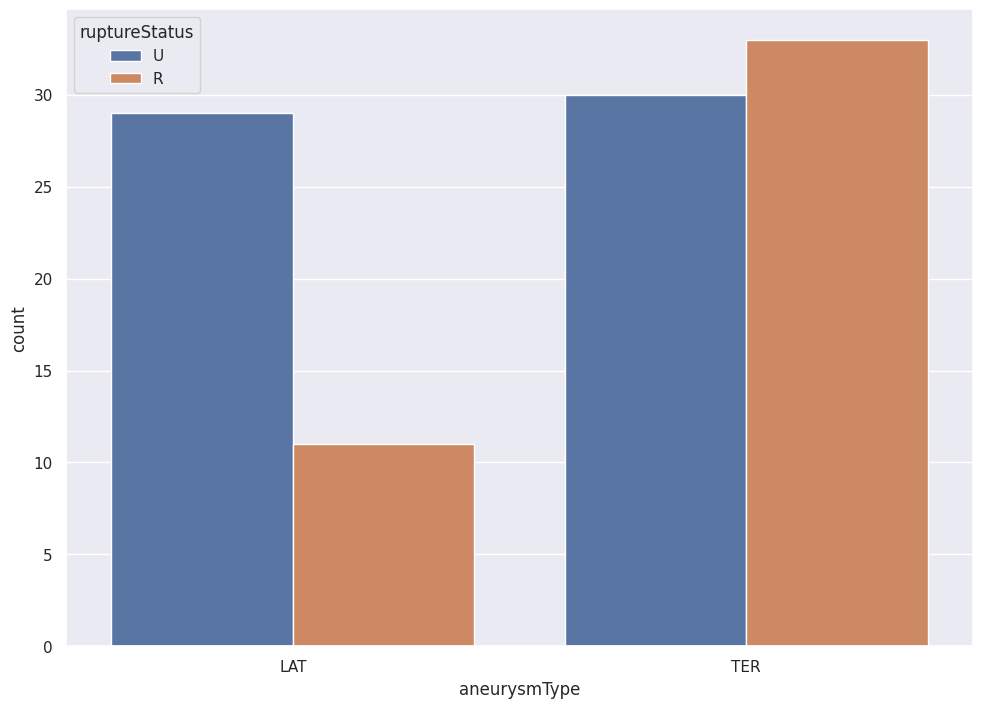

In [ ]:
sns.countplot(data=data, x='aneurysmType', hue='ruptureStatus')
pass

Наиболее часто разрываются мешотчатая аневризма (TER)

Построим диаграмму, иллюстрирующую зависимость разрыва аневризмы от возраста пациента.

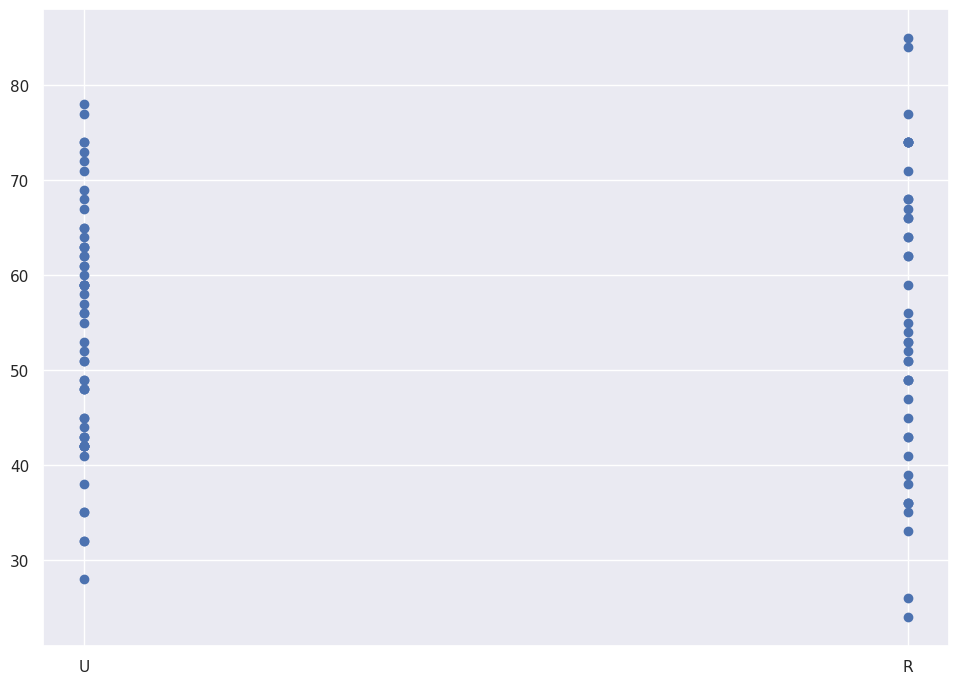

In [ ]:
plt.scatter(data['ruptureStatus'], data['age'])
pass

Наибольшее число разрывов аневризм фиксируется в у пацентов в возрасте от 50 до 60 лет

Построим гистограммы некоторых признаков (ввиду их большого числа ограничимся десятью примерами).

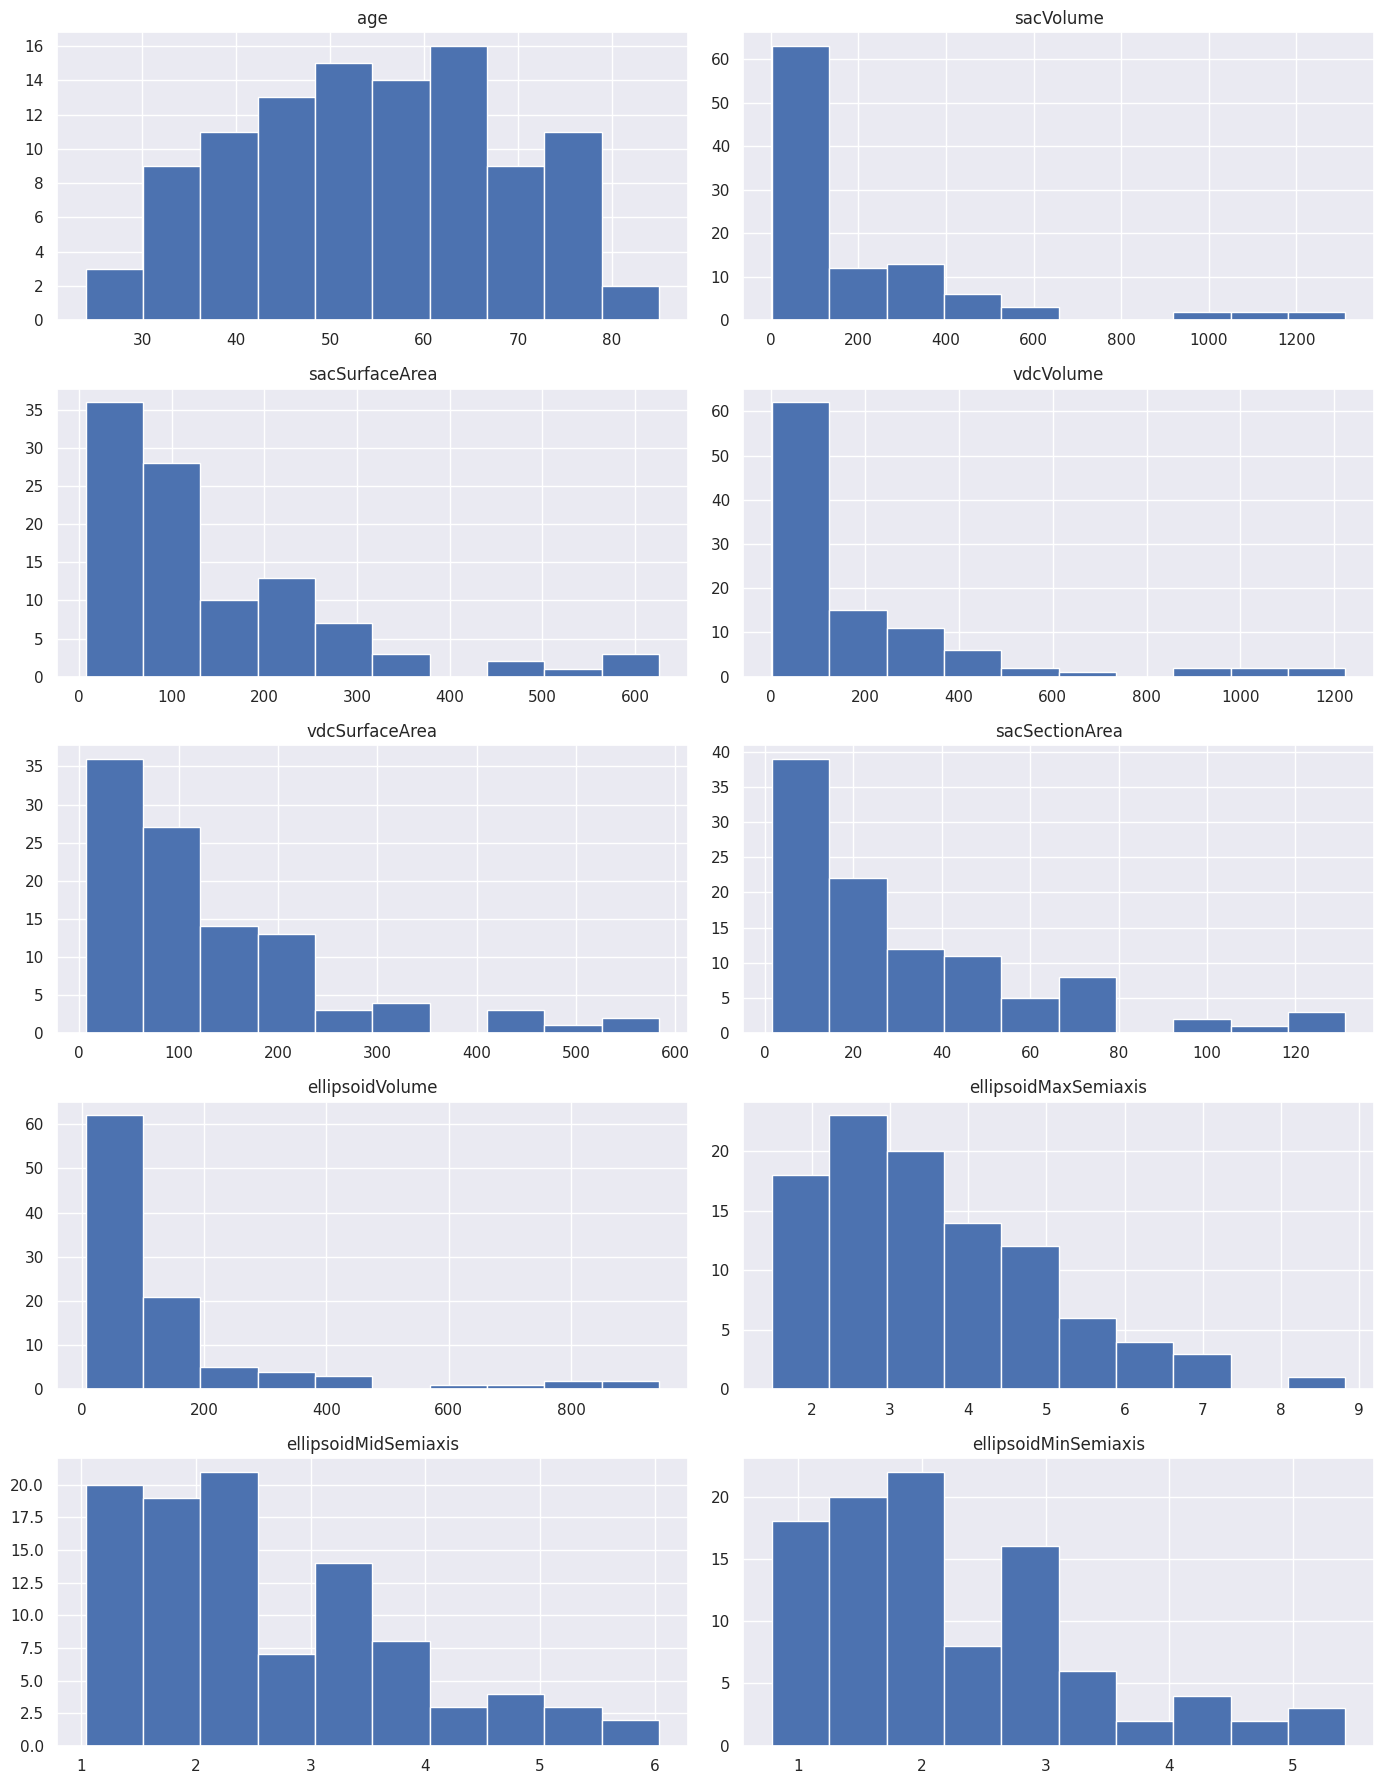

In [ ]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_columns = numeric_columns[:10]
data_hist = data[numeric_columns]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
axes = axes.ravel()
for i in range(len(data_hist.columns)):
    axes[i].hist(data_hist.iloc[:, i], bins=10)
    axes[i].set_title(data_hist.columns[i])
plt.tight_layout()
plt.show()

**3. Обработка категориальных признаков.** Посмотрим, какие типы признаков имеются в датасете.

In [ ]:
print(data.dtypes)

aneurysmLocation               object
aneurysmType                   object
age                             int64
sex                            object
multipleAneurysms                bool
sacVolume                     float64
sacSurfaceArea                float64
vdcVolume                     float64
vdcSurfaceArea                float64
sacSectionArea                float64
ellipsoidVolume               float64
ellipsoidMaxSemiaxis          float64
ellipsoidMidSemiaxis          float64
ellipsoidMinSemiaxis          float64
sacCenterlineLength           float64
ostiumSectionArea             float64
ostiumSectionPerimeter        float64
ostiumMinSize                 float64
ostiumMaxSize                 float64
ostiumShapeFactor             float64
aspectRatio_star              float64
sizeRatio_star                float64
vesselDiameter                float64
neckVesselAngle               float64
sacVesselAngle                float64
sacMinPressure                float64
sacMaxPressu

Таким образом, в датасете имеется три типа признаков:

1.   бинарные - столбец multipleAneurysms;
2.   категориальные - столбцы aneurysmLocation, aneurysmType, sex, vesselName, ruptureStatus;
3.   числовые - столбцы age, sacVolume, sacSurfaceArea, vdcVolume и прочие, не вошедшие в первые два пункта.

Перечислим признаки, которые могут быть категориальными:


1.   Признак "aneurysmLocation" принимает значения - 'ICA',  'ACA',  'MCA',  'BAS';
2.   Признак "aneurysmType" принимает значения - 'LAT', 'TER';
3.   Признак "sex" принимает значения - 'M', 'F';
4.   Признак "vesselName" принимает значения - 'ICA',  'ACA',  'MCA',  'BAS';
5.   Признак "ruptureStatus" принимает значения - 'U', 'R'.

Выполним преобразование перечисленных признаков к типу "int" для возможности построения корреляционной диаграммы и обеспечения возможности их обработки алгоритмами машинного обучения.


In [ ]:
data['multipleAneurysms'] = data['multipleAneurysms'].astype(int)

In [ ]:
print(data['aneurysmLocation'].unique())
data.loc[(data.aneurysmLocation == 'ICA'), 'aneurysmLocation'] = 1
data.loc[(data.aneurysmLocation == 'ACA'), 'aneurysmLocation'] = 2
data.loc[(data.aneurysmLocation == 'MCA'), 'aneurysmLocation'] = 3
data.loc[(data.aneurysmLocation == 'BAS'), 'aneurysmLocation'] = 4
data['aneurysmLocation'] = data['aneurysmLocation'].astype('int')

['ICA' 'ACA' 'MCA' 'BAS']


In [ ]:
print(data['vesselName'].unique())
data.loc[(data.vesselName == 'ICA'), 'vesselName'] = 1
data.loc[(data.vesselName == 'ACA'), 'vesselName'] = 2
data.loc[(data.vesselName == 'MCA'), 'vesselName'] = 3
data.loc[(data.vesselName == 'BAS'), 'vesselName'] = 4
data['vesselName'] = data['vesselName'].astype('int')

['ICA' 'ACA' 'MCA' 'BAS']


Значения в столбцах "aneurysmLocation" и "vesselName" кажутся подозрительными. Их мы дополнительно исследуем после построения корреляционной матрицы.

In [ ]:
print(data['aneurysmType'].unique())
data.loc[(data.aneurysmType == 'LAT'), 'aneurysmType'] = 0
data.loc[(data.aneurysmType == 'TER'), 'aneurysmType'] = 1
data['aneurysmType'] = data['aneurysmType'].astype('int')

['LAT' 'TER']


In [ ]:
print(data['sex'].unique())
data.loc[(data.sex == 'M'), 'sex'] = 0
data.loc[(data.sex == 'F'), 'sex'] = 1
data['sex'] = data['sex'].astype('int')

['F' 'M']


In [ ]:
print(data['ruptureStatus'].unique())
data.loc[(data.ruptureStatus == 'U'), 'ruptureStatus'] = 0
data.loc[(data.ruptureStatus == 'R'), 'ruptureStatus'] = 1
data['ruptureStatus'] = data['ruptureStatus'].astype('int')

['U' 'R']


**4. Обработка пропущенных значений.** Посмотрим, сколько пропущенных значений имеется в каждом столбце:

In [ ]:
data.isnull().sum()

,0
aneurysmLocation,0
aneurysmType,0
age,0
sex,0
multipleAneurysms,0
sacVolume,0
sacSurfaceArea,0
vdcVolume,0
vdcSurfaceArea,0
sacSectionArea,0


Видим, что в 26 столбцах присутствуют пропущенные значения (NaN). Все они являются числовыми переменными.

Вычислим для каждого столбца разброс по пропущенным значениям (в процентах). Восстановление признаков с разбросом более 90% не представляется возможным, поэтому такие признаки будут удалены из датасета. Признаки с разбросом менее 2% будут восстановлены с использованием медианного значения.

In [ ]:
print((data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False))

sacMinTAWSS                   92.233010
sacMeanPressure               92.233010
sacMinPressure                92.233010
sacMaxSpeed                   92.233010
sacMeanSpeed                  92.233010
sacMaxTAWSS                   92.233010
sacMeanTAWSS                  92.233010
sacMinOSI                     92.233010
sacMaxOSI                     92.233010
sacMeanOSI                    92.233010
minPressure                   92.233010
maxPressure                   92.233010
meanPressure                  92.233010
sacMaxPressure                92.233010
maxSpeed                      92.233010
meanSpeed                     92.233010
minTAWSS                      92.233010
maxTAWSS                      92.233010
meanTAWSS                     92.233010
minOSI                        92.233010
maxOSI                        92.233010
meanOSI                       92.233010
ellipsoidMidSemiaxis           1.941748
ellipsoidMaxSemiaxis           1.941748
ellipsoidVolume                1.941748


Удалим признаки, восстановление которых не представляется возможным.

In [ ]:
delCol = []
t = (data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)
for i in range(len(t)):
  if t.iloc[i] > 90:
    delCol.append(t.index[i])

print(delCol)

['sacMinTAWSS', 'sacMeanPressure', 'sacMinPressure', 'sacMaxSpeed', 'sacMeanSpeed', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI', 'sacMeanOSI', 'minPressure', 'maxPressure', 'meanPressure', 'sacMaxPressure', 'maxSpeed', 'meanSpeed', 'minTAWSS', 'maxTAWSS', 'meanTAWSS', 'minOSI', 'maxOSI', 'meanOSI']


In [ ]:
data.drop(delCol, axis=1, inplace=True)
data.shape

(103, 38)

In [ ]:
data

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus
0,1,0,53,1,0,125.259604,120.453515,111.237957,106.759273,21.938237,...,0.149981,0.218960,0.682769,0.938298,2.092899,0.513167,3.218984,76.670529,4.719235,0
1,1,0,35,1,0,119.002032,122.427263,113.720361,115.774279,18.493788,...,0.171728,0.226861,1.153133,1.388250,2.629028,0.532819,5.330711,116.839304,15.753911,0
2,1,1,43,1,0,12.740609,23.480617,11.865511,21.853480,6.142748,...,0.154458,0.265859,0.804790,1.288915,1.919531,0.299136,3.393943,123.657085,9.378066,0
3,1,1,60,1,1,9.376307,18.084625,9.031234,17.295395,4.905063,...,0.135058,0.240853,0.837999,1.069440,1.915735,0.296743,5.385147,129.829251,27.053597,0
4,1,0,26,1,0,37.934454,54.844592,35.903048,52.303479,9.729065,...,0.125326,0.249789,0.548677,0.694086,2.024693,0.355401,8.852139,117.065812,23.284114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4,1,43,1,0,76.340708,75.181897,73.667218,72.394490,23.546124,...,0.035592,0.580623,0.030128,1.182271,1.633734,0.100354,206.185748,142.638440,24.376264,0
99,4,1,67,0,0,436.828426,260.200509,406.697959,235.955139,70.007099,...,0.040250,2.902317,0.004633,1.102568,1.461093,0.122552,369.150248,170.869270,31.984847,1
100,1,0,84,1,0,94.271201,100.528873,90.072358,95.666266,19.046069,...,0.177326,0.423415,0.660796,1.353043,2.451011,0.530284,137.867462,124.049528,17.519173,1
101,3,1,59,1,0,1022.481082,466.087643,981.326431,446.253620,111.244307,...,0.017038,0.589782,0.001915,1.178609,1.467881,0.038822,67.053940,185.431347,15.662535,1


In [ ]:
print(data.isnull().sum())

aneurysmLocation              0
aneurysmType                  0
age                           0
sex                           0
multipleAneurysms             0
sacVolume                     0
sacSurfaceArea                0
vdcVolume                     0
vdcSurfaceArea                0
sacSectionArea                0
ellipsoidVolume               2
ellipsoidMaxSemiaxis          2
ellipsoidMidSemiaxis          2
ellipsoidMinSemiaxis          2
sacCenterlineLength           0
ostiumSectionArea             0
ostiumSectionPerimeter        0
ostiumMinSize                 0
ostiumMaxSize                 0
ostiumShapeFactor             0
aspectRatio_star              0
sizeRatio_star                0
vesselDiameter                0
neckVesselAngle               0
sacVesselAngle                0
vesselName                    0
length                        0
meanRadius                    0
meanCurvature                 0
meanTorsion                   0
tortuosity                    0
minRadiu

Применим восстановление медианой к признакам 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis'.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
for i in ['ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis']:
  data[i] = imputer.fit_transform(data[i].values.reshape(-1,1))

data.isna().sum()

,0
aneurysmLocation,0
aneurysmType,0
age,0
sex,0
multipleAneurysms,0
sacVolume,0
sacSurfaceArea,0
vdcVolume,0
vdcSurfaceArea,0
sacSectionArea,0


In [ ]:
print(data.dtypes)

aneurysmLocation                int64
aneurysmType                    int64
age                             int64
sex                             int64
multipleAneurysms               int64
sacVolume                     float64
sacSurfaceArea                float64
vdcVolume                     float64
vdcSurfaceArea                float64
sacSectionArea                float64
ellipsoidVolume               float64
ellipsoidMaxSemiaxis          float64
ellipsoidMidSemiaxis          float64
ellipsoidMinSemiaxis          float64
sacCenterlineLength           float64
ostiumSectionArea             float64
ostiumSectionPerimeter        float64
ostiumMinSize                 float64
ostiumMaxSize                 float64
ostiumShapeFactor             float64
aspectRatio_star              float64
sizeRatio_star                float64
vesselDiameter                float64
neckVesselAngle               float64
sacVesselAngle                float64
vesselName                      int64
length      

Вычислим корреляционную матрицу.

In [66]:
matr = data.corr(numeric_only = True)
matr

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus
aneurysmLocation,1.000000,0.661647,-0.039276,-0.352129,-0.080026,-0.200818,-0.219842,-0.197066,-0.216659,-0.184830,...,-0.852721,0.271541,-0.779759,-0.327546,-0.600001,-0.799082,0.060005,0.268862,0.309804,0.130959
aneurysmType,0.661647,1.000000,-0.072763,-0.361541,-0.075022,-0.343254,-0.365807,-0.340477,-0.370422,-0.347496,...,-0.761551,0.292304,-0.771277,-0.472834,-0.784456,-0.785934,0.123205,0.452778,0.350138,0.245140
age,-0.039276,-0.072763,1.000000,-0.075177,0.109214,0.181444,0.203610,0.167348,0.178993,0.179735,...,0.065431,-0.017176,0.040793,0.166161,0.182099,0.084984,0.026667,-0.107141,0.142314,0.036922
sex,-0.352129,-0.361541,-0.075177,1.000000,0.068936,0.000690,-0.019241,0.010525,-0.010878,-0.024459,...,0.415600,-0.034096,0.374557,0.107594,0.293121,0.387612,0.066791,-0.263015,-0.166753,-0.071874
multipleAneurysms,-0.080026,-0.075022,0.109214,0.068936,1.000000,-0.044065,-0.050590,-0.035299,-0.034477,-0.025758,...,0.065690,0.026060,0.127648,0.040480,-0.003751,0.049418,0.114056,-0.009292,0.175159,-0.225340
sacVolume,-0.200818,-0.343254,0.181444,0.000690,-0.044065,1.000000,0.980898,0.995068,0.982226,0.959565,...,0.139087,-0.119792,0.208695,0.219145,0.380785,0.218858,-0.044427,0.033521,-0.136880,-0.195747
sacSurfaceArea,-0.219842,-0.365807,0.203610,-0.019241,-0.050590,0.980898,1.000000,0.966948,0.985416,0.962082,...,0.148975,-0.137165,0.221378,0.218602,0.382620,0.226965,-0.055162,0.043784,-0.123502,-0.183864
vdcVolume,-0.197066,-0.340477,0.167348,0.010525,-0.035299,0.995068,0.966948,1.000000,0.984681,0.956524,...,0.141644,-0.113266,0.213295,0.223236,0.377661,0.219695,-0.040792,0.037329,-0.141277,-0.201617
vdcSurfaceArea,-0.216659,-0.370422,0.178993,-0.010878,-0.034477,0.982226,0.985416,0.984681,1.000000,0.964028,...,0.157193,-0.128234,0.235970,0.232159,0.387034,0.231474,-0.048308,0.047878,-0.134362,-0.203393
sacSectionArea,-0.184830,-0.347496,0.179735,-0.024459,-0.025758,0.959565,0.962082,0.956524,0.964028,1.000000,...,0.132137,-0.121760,0.211530,0.221480,0.370414,0.214392,-0.060749,0.053858,-0.115446,-0.183608


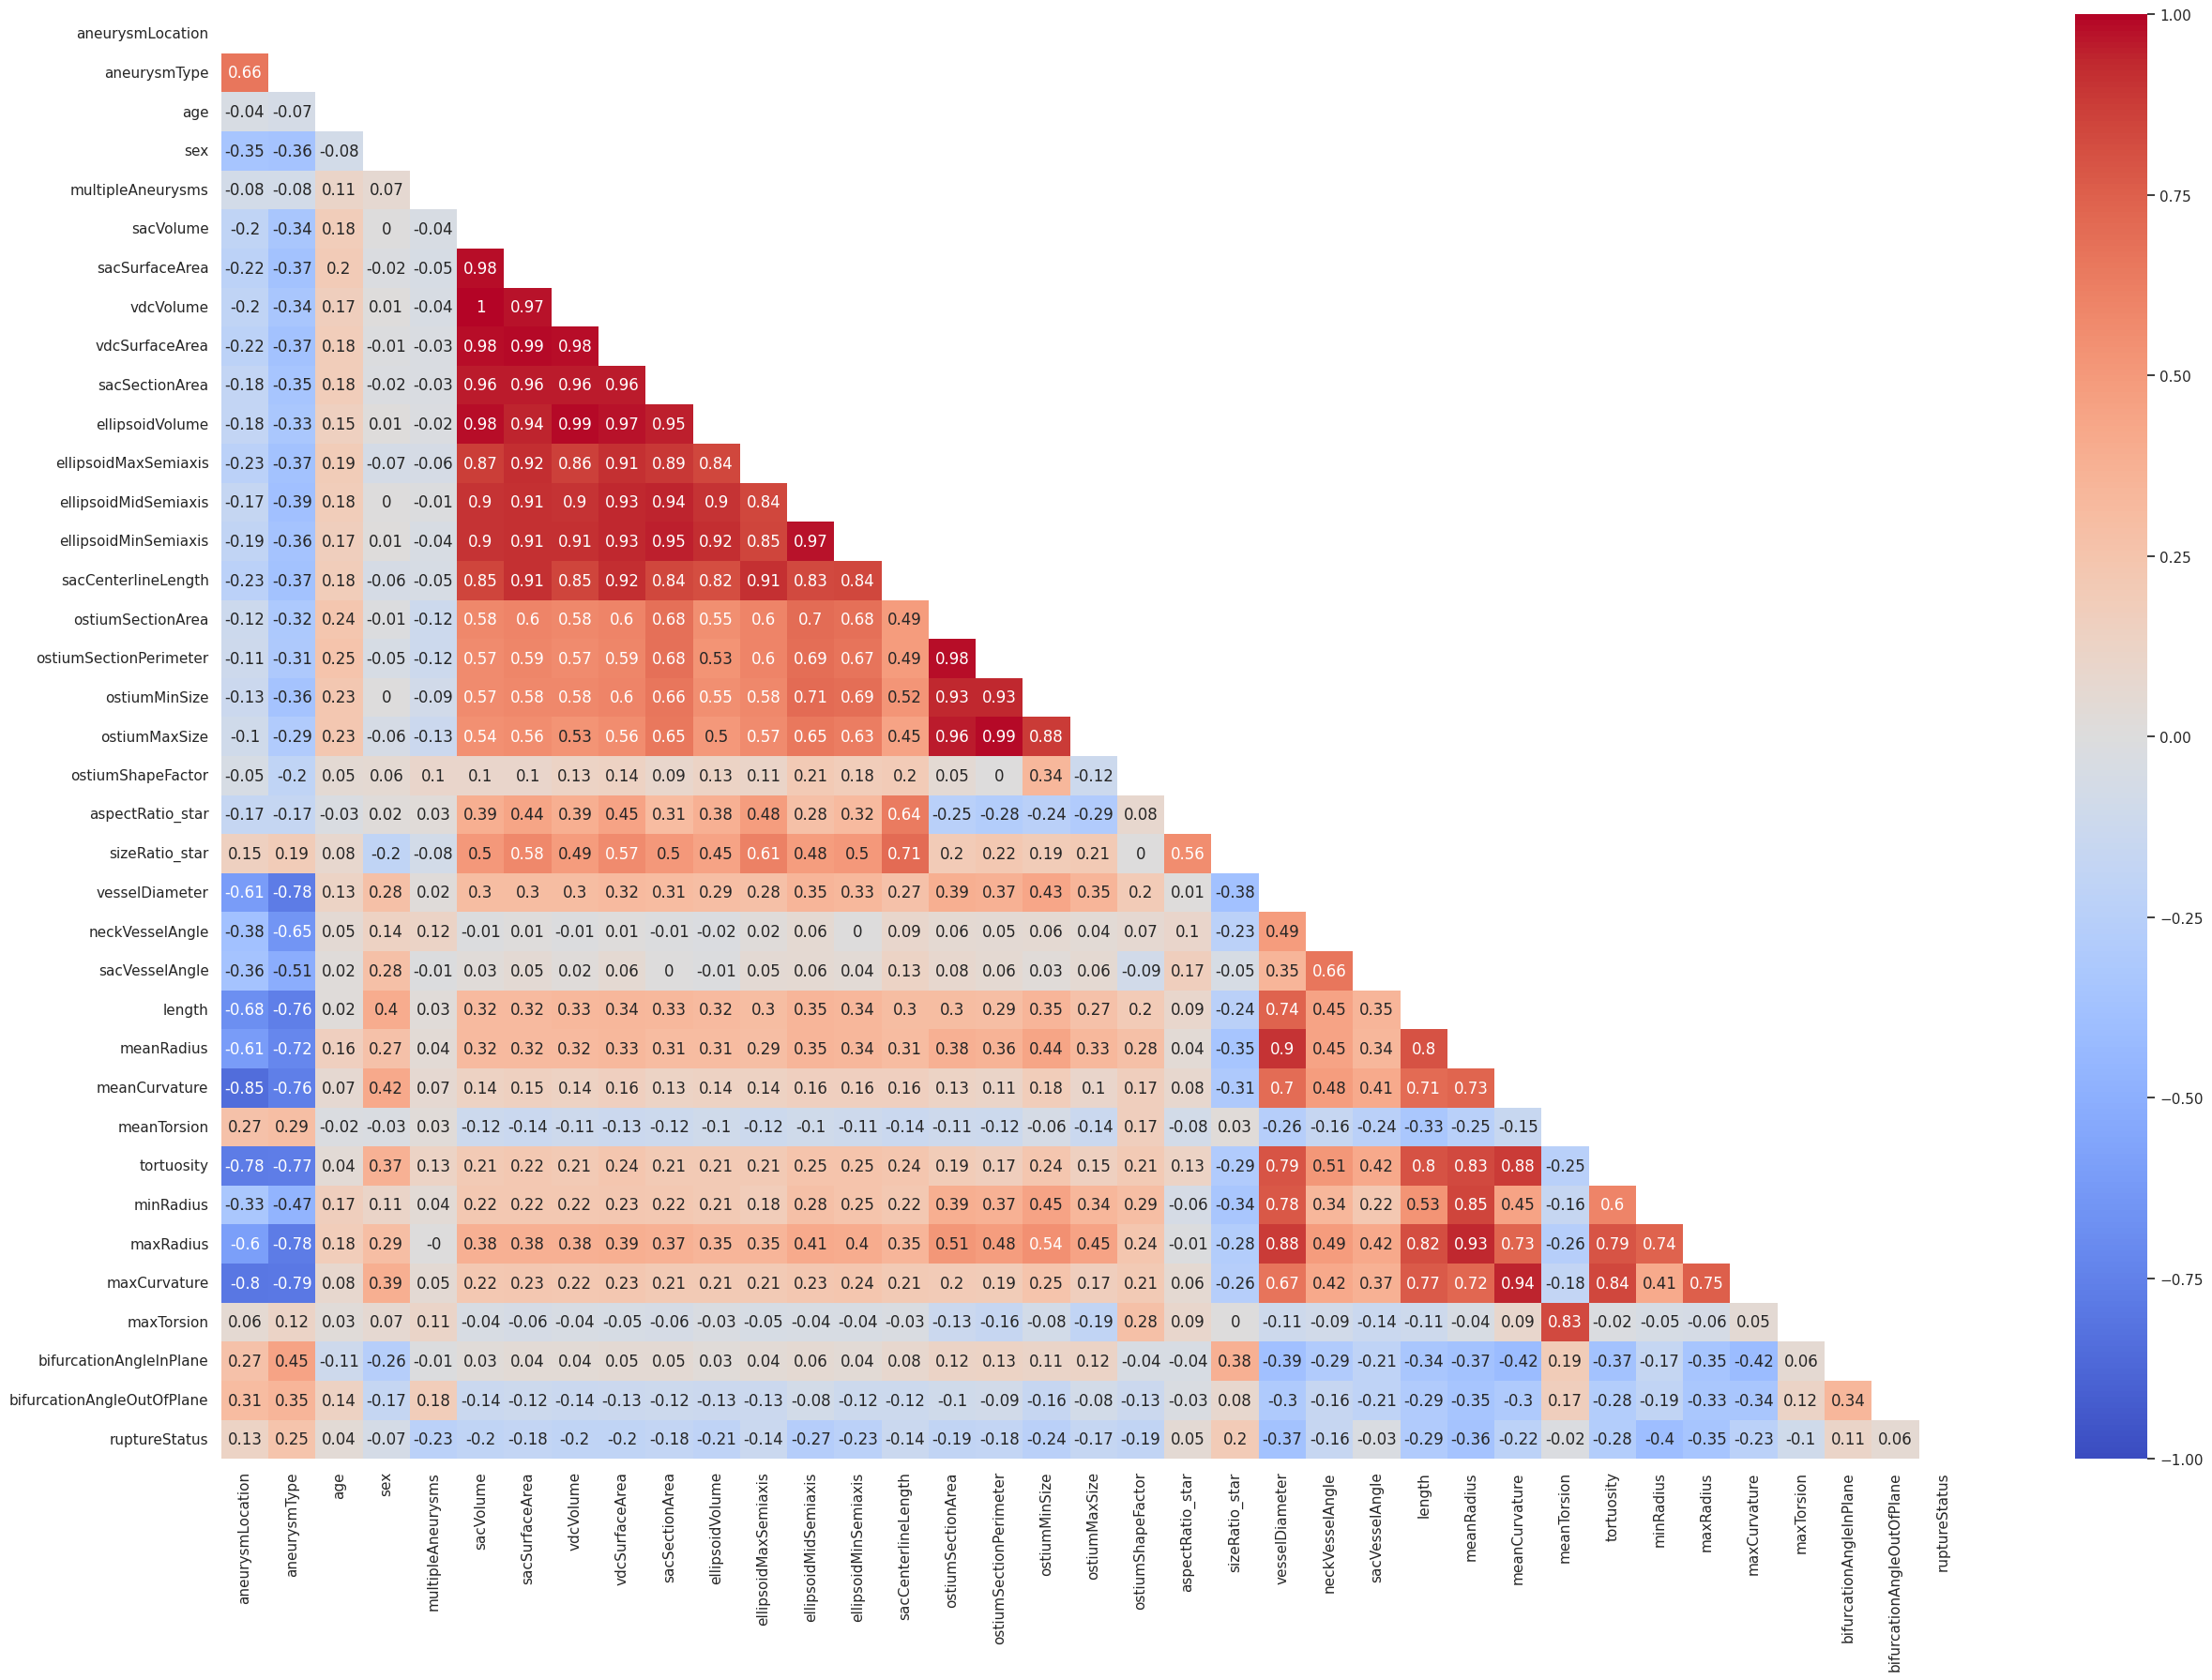

In [67]:
corr_matrix = round(data.corr(numeric_only = True), 2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask)

На корреляционной диаграмме можно выделить группы признаков с высокой корреляцией (> 0.90):
1.   гистоморфологическая группа sacSurfaceArea - sacCenterlineLength;
2.   гистоморфологическая группа ostiumSectionPerimeter - ostiumMaxSize;
3.   гистоморфологические пары maxRadius - meanRadius, maxCurvature - meanCurvature.

Все эти признаки относятся к гистоморфологическим характеристикам аневризм головного мозга и используются для описания геометричской формы аневризмы (пример: чем больше объем аневризмы, тем больше её площадь поверхности).

Следует отметить, что случаи разрыва аневризмы не особо сильно коррелируют с прочими признаками. Это может указывать на неэффективность использования линейных моделей на данном датасете, возможно, более целесообразно использовать деревья решений или нейронные сети.

**6. Исключение одинаковых столбцов.** Исследуем причины высокой корреляции признаков "aneurysmLocation" и "vesselName" подробнее. Явно проверим полное совпадение столбцов aneurysmLocation и vesselName.

In [ ]:
flag = True
n = 0
for i in range(len(data)):
  if data['vesselName'][i] != data['aneurysmLocation'][i]:
    flag = False
    break
  n += 1

print("Результаты проверки столбцов. Флаг полного совпадения -", flag, ", количество проверенных строк -", n)

Результаты проверки столбцов. Флаг полного совпадения - True , количество проверенных строк - 103


Удалим столбец "vesselName", который по неизвестной причине полностью дублирует столбец "aneurysmLocation", с целью сокращения времени обучения выбранных моделей машинного обучения и памяти, необходимой для хранения датасета.

In [ ]:
data.drop(['vesselName'], axis=1, inplace=True)
data.shape

(103, 37)

**7. Определение несбалансированности классов.**

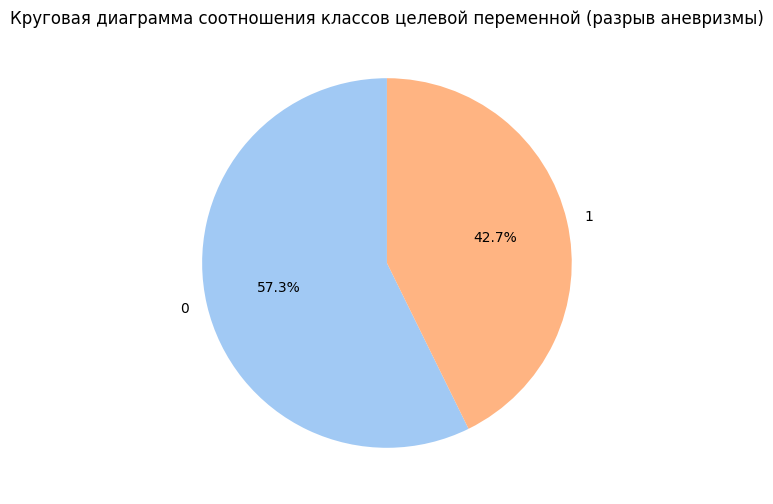

In [ ]:
rupture_counts = data['ruptureStatus'].value_counts()
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(rupture_counts, labels=rupture_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Круговая диаграмма соотношения классов целевой переменной (разрыв аневризмы)')
plt.show()

Исходя из анализа полученной круговой диаграммы, можно сделать вывод о том, что датасет в целом сбалансирован.

**8. Проведение нормализации данных.** Необходимость проведения нормализации обусловлена различным масштабом исходных данных. Кроме того, многие алгоритмы машинного обучения чувствительны к масштабированию данных (например, метод ближайших соседей, машина опорных веторов).

In [75]:
data_crop = data.drop('ruptureStatus', axis = 1)
data_class = data['ruptureStatus']

In [76]:
data_crop = (data_crop - data_crop.mean(axis = 0))/data_crop.std(axis = 0)
data_crop

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,...,meanRadius,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane
0,-0.952785,-1.248883,-0.114142,0.760881,-0.442442,-0.295165,-0.183858,-0.300669,-0.190678,-0.337269,...,0.512743,0.924858,-0.462371,0.626280,-0.659998,0.359083,1.680484,-0.684435,-1.736944,-1.549954
1,-0.952785,-1.248883,-1.420430,0.760881,-0.442442,-0.317562,-0.169088,-0.290944,-0.115153,-0.456300,...,0.920509,1.323128,-0.451545,1.672785,0.949635,1.168599,1.799582,-0.670244,-0.291551,-0.434976
2,-0.952785,0.792942,-0.839858,0.760881,-0.442442,-0.697890,-0.909523,-0.689948,-0.901988,-0.883119,...,0.504629,1.006845,-0.398112,0.897763,0.594278,0.097308,0.383387,-0.683259,-0.046226,-1.079211
3,-0.952785,0.792942,0.393859,0.760881,2.238238,-0.709932,-0.949902,-0.701051,-0.940174,-0.925890,...,0.394735,0.651548,-0.432375,0.971649,-0.190857,0.091577,0.368887,-0.669878,0.175867,0.706779
4,-0.952785,-1.248883,-2.073575,0.760881,-0.442442,-0.607717,-0.674821,-0.595784,-0.646889,-0.759186,...,-0.326279,0.473317,-0.420131,0.327941,-1.533630,0.256095,0.724373,-0.646579,-0.283400,0.325899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2.082375,0.792942,-0.839858,0.760881,-0.442442,-0.470254,-0.522633,-0.447847,-0.478573,-0.281705,...,-0.261603,-1.170078,0.033155,-0.825769,0.212779,-0.334225,-0.821295,0.679546,0.636780,0.436253
99,2.082375,0.792942,0.901861,-1.301507,-0.442442,0.819994,0.861894,0.856760,0.891678,1.323863,...,-0.554845,-1.084764,3.214183,-0.882493,-0.072346,-0.594900,-0.686767,1.774703,1.652610,1.205048
100,-0.952785,-1.248883,2.135577,0.760881,-0.442442,-0.406078,-0.332957,-0.383582,-0.283611,-0.437215,...,0.957288,1.425663,-0.182241,0.577392,0.823688,0.899805,1.784221,0.220432,-0.032105,-0.256609
101,1.070655,0.792942,0.321288,0.760881,-0.442442,2.916147,2.402583,3.107796,2.653483,2.748911,...,-0.372468,-1.509880,0.045704,-0.888541,0.199679,-0.584651,-1.194199,-0.255450,2.176597,-0.444209


In [77]:
data = pd.concat((data_crop, data_class), axis = 1)
data

,aneurysmLocation,aneurysmType,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus
0,-0.952785,-1.248883,-0.114142,0.760881,-0.442442,-0.295165,-0.183858,-0.300669,-0.190678,-0.337269,...,0.924858,-0.462371,0.626280,-0.659998,0.359083,1.680484,-0.684435,-1.736944,-1.549954,0
1,-0.952785,-1.248883,-1.420430,0.760881,-0.442442,-0.317562,-0.169088,-0.290944,-0.115153,-0.456300,...,1.323128,-0.451545,1.672785,0.949635,1.168599,1.799582,-0.670244,-0.291551,-0.434976,0
2,-0.952785,0.792942,-0.839858,0.760881,-0.442442,-0.697890,-0.909523,-0.689948,-0.901988,-0.883119,...,1.006845,-0.398112,0.897763,0.594278,0.097308,0.383387,-0.683259,-0.046226,-1.079211,0
3,-0.952785,0.792942,0.393859,0.760881,2.238238,-0.709932,-0.949902,-0.701051,-0.940174,-0.925890,...,0.651548,-0.432375,0.971649,-0.190857,0.091577,0.368887,-0.669878,0.175867,0.706779,0
4,-0.952785,-1.248883,-2.073575,0.760881,-0.442442,-0.607717,-0.674821,-0.595784,-0.646889,-0.759186,...,0.473317,-0.420131,0.327941,-1.533630,0.256095,0.724373,-0.646579,-0.283400,0.325899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2.082375,0.792942,-0.839858,0.760881,-0.442442,-0.470254,-0.522633,-0.447847,-0.478573,-0.281705,...,-1.170078,0.033155,-0.825769,0.212779,-0.334225,-0.821295,0.679546,0.636780,0.436253,0
99,2.082375,0.792942,0.901861,-1.301507,-0.442442,0.819994,0.861894,0.856760,0.891678,1.323863,...,-1.084764,3.214183,-0.882493,-0.072346,-0.594900,-0.686767,1.774703,1.652610,1.205048,1
100,-0.952785,-1.248883,2.135577,0.760881,-0.442442,-0.406078,-0.332957,-0.383582,-0.283611,-0.437215,...,1.425663,-0.182241,0.577392,0.823688,0.899805,1.784221,0.220432,-0.032105,-0.256609,1
101,1.070655,0.792942,0.321288,0.760881,-0.442442,2.916147,2.402583,3.107796,2.653483,2.748911,...,-1.509880,0.045704,-0.888541,0.199679,-0.584651,-1.194199,-0.255450,2.176597,-0.444209,1


**9. Разбиение данных на обучающую и тестовую выборку.**

In [78]:
X = data.drop('ruptureStatus', axis = 1)
y = data['ruptureStatus']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(82, 21)

**10. Применение KNN и подбор оптимального количества ближайших соседей.**

Следуя авторитетному мнению лектора, применим KNN, т.к. "этот метод устойчив к выбросам и достаточно точен, поэтому его можно использовать как хороший *baseline*".

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import accuracy_score, log_loss

In [111]:
accuracy_train = []
accuracy_test = []
loss_train = []
loss_test = []
error_rate_train = []
error_rate_test = []
neighbors = []

In [112]:
for i in range(2, 82, 4):
    model = KNeighborsClassifier(algorithm='auto', n_neighbors=i, n_jobs=-1)
    model.fit(X_train, y_train)

    neighbors.append(i)

    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))

    error_rate_train.append(1-accuracy_score(y_train, model.predict(X_train)))
    error_rate_test.append(1-accuracy_score(y_test, model.predict(X_test)))

    loss_train.append(log_loss(y_train, model.predict_proba(X_train)))
    loss_test.append(log_loss(y_test, model.predict_proba(X_test)))

    report = classification_report(y_test, model.predict(X_test))
    print(report)

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.44      0.44      0.44         9

    accuracy                           0.52        21
   macro avg       0.51      0.51      0.51        21
weighted avg       0.52      0.52      0.52        21

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.56      0.56      0.56         9

    accuracy                           0.62        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.62      0.62      0.62        21

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.44      0.44      0.44         9

    accuracy                           0.52        21
   macro avg       0.51      0.51      0.51        21
weighted avg       0.52      0.52      0.52        21

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       0.00      0.00      0.00         9

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       0.00      0.00      0.00         9

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       0.00      0.00      0.00         9

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
len(accuracy_train)

20

Text(0, 0.5, 'Точность')

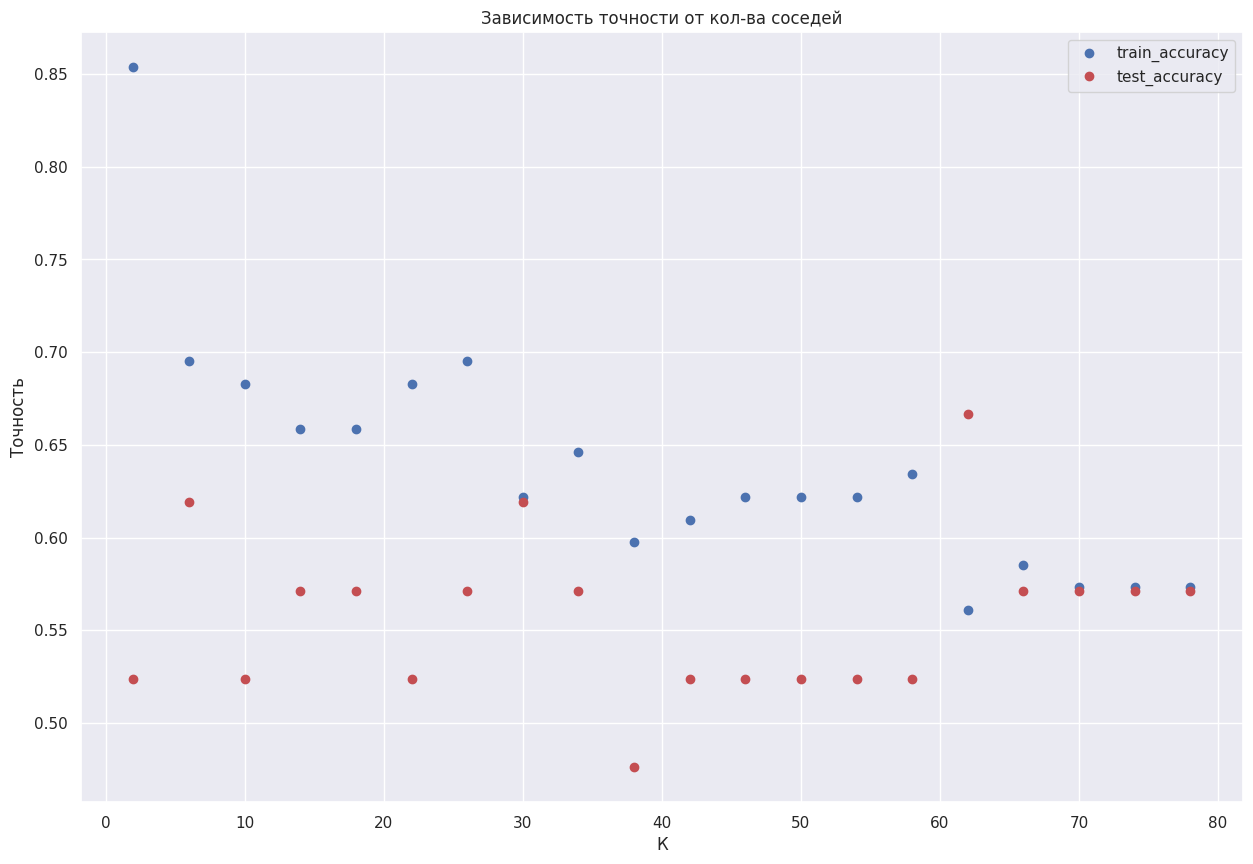

In [114]:
plt.figure(figsize=(15,10))

plt.plot(neighbors, accuracy_train, 'bo', neighbors, accuracy_test, 'ro')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.title('Зависимость точности от кол-ва соседей')
plt.xlabel('К')
plt.ylabel('Точность')

**11. Вычисление ошибок на обучающей и тестовой выборках.**

In [115]:
print("Ошибка на тестовой выборке: ", round(accuracy_test[15], 2))
print("Ошибка на тренировочной выборке: ", round(accuracy_train[15], 2))

Ошибка на тестовой выборке:  0.67
Ошибка на тренировочной выборке:  0.56


При K = 62 точность на тестовой выборке достигает максимального значения и примерно равняется 67%. Ошибка на тренировочной выборке при этом же значении параметра K достигает 56%. Такая небольшая точность классификации является следствием малого объема датасета.

Text(0, 0.5, 'Кросс-энтропия')

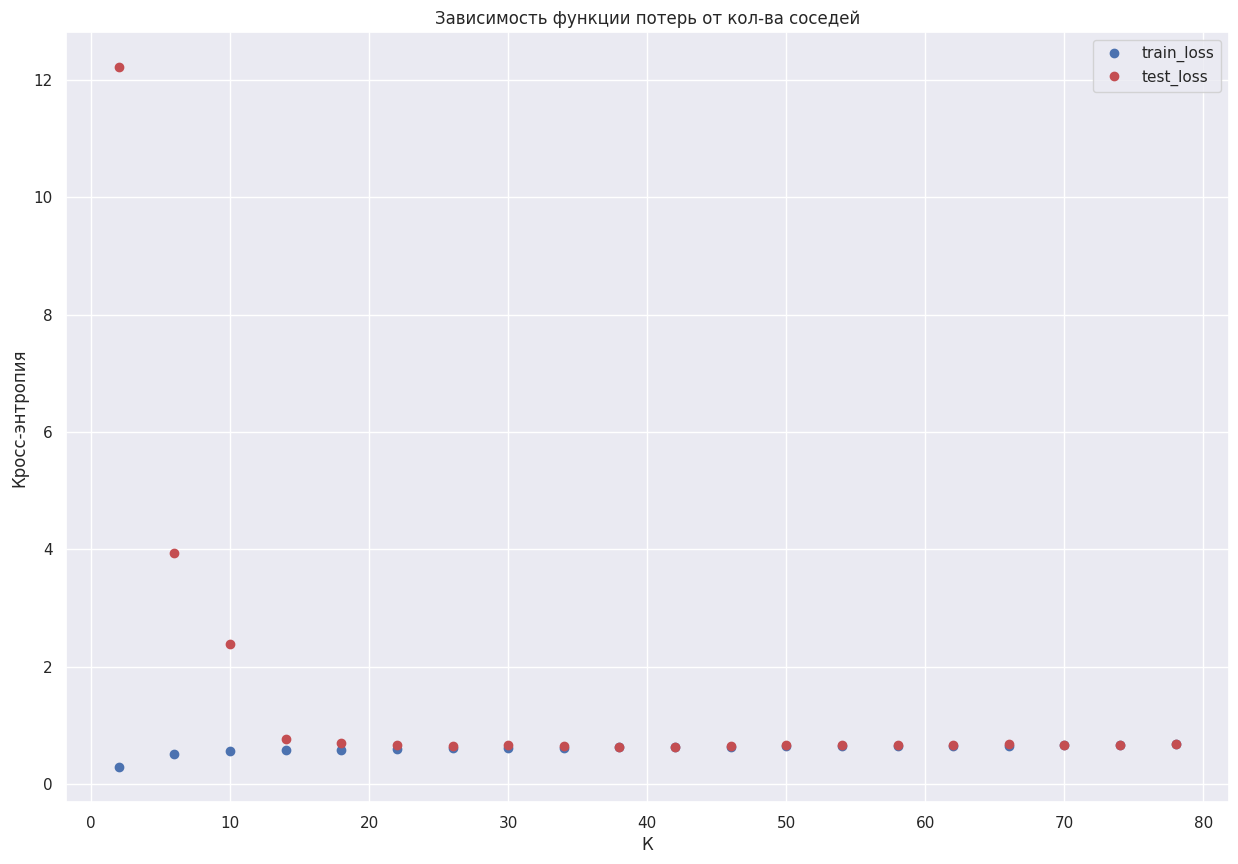

In [116]:
plt.figure(figsize=(15,10))

plt.plot(neighbors, loss_train, 'bo', neighbors, loss_test, 'ro')
plt.legend(['train_loss', 'test_loss'])
plt.title('Зависимость функции потерь от кол-ва соседей')
plt.xlabel('К')
plt.ylabel('Кросс-энтропия')

Видим, что значение кросс-энтропии при таком объеме выборки может достигнуть отметки 0.7

**12. Другие классификаторы.**

In [118]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(round(err_train, 2), round(err_test, 2))

0.17 0.48


[[7 5]
 [5 4]]


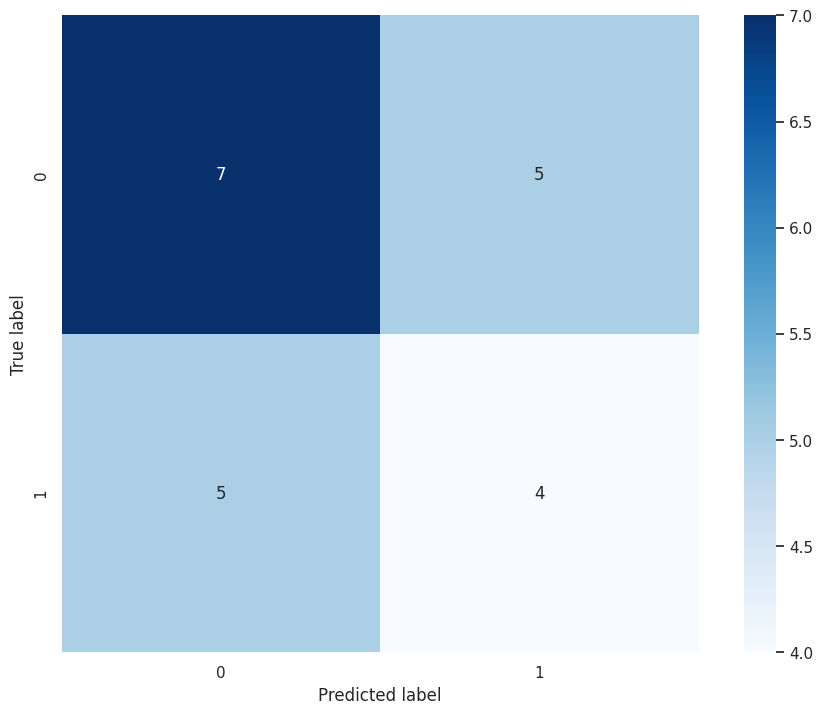

In [119]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test,svc.predict(X_test)))

In [120]:
import xgboost
xgb = xgboost.XGBClassifier(enable_categorical = True)
xgb.fit(X_train, y_train)
err_train = np.mean(y_train != xgb.predict(X_train))
err_test  = np.mean(y_test  != xgb.predict(X_test))

print(round(err_train, 2), round(err_test, 2))

0.0 0.43


[[9 3]
 [6 3]]


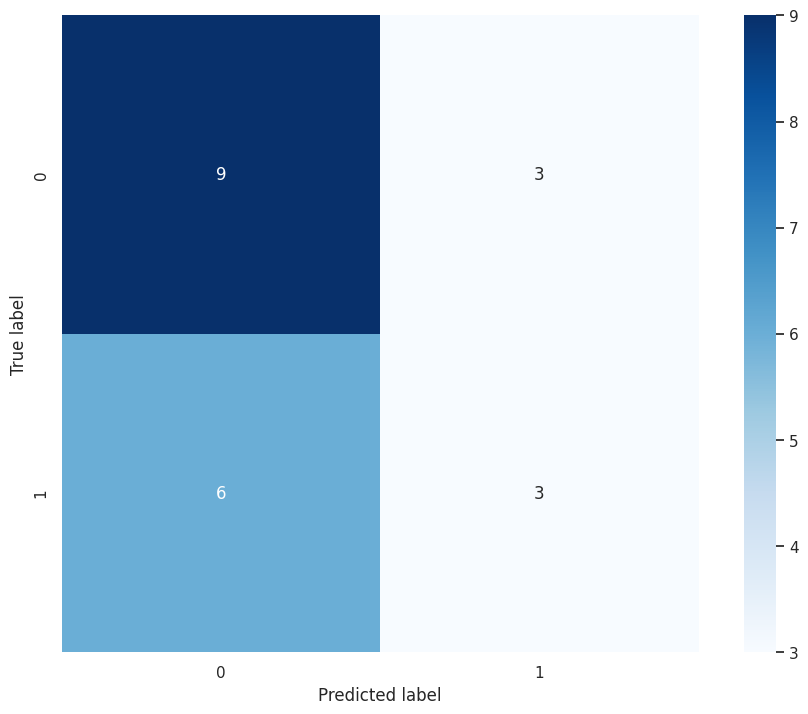

In [121]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, xgb.predict(X_test)))

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

[[7 5]
 [5 4]]


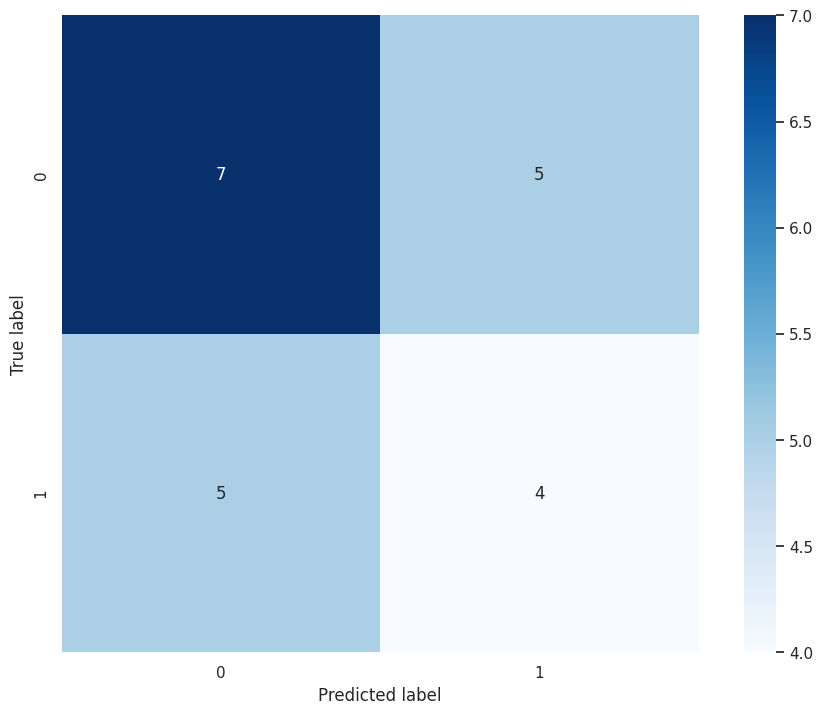

In [123]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass
print(confusion_matrix(y_test, rfc.predict(X_test)))

In [124]:
err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != rfc.predict(X_test))

print(round(err_train, 2), round(err_test, 2))

0.0 0.48


**13. Вывод.** Наибольшей точностью на тестовой выборке обладает KNN с параметром K, равным 16. Таким образом, в результате выполнения данной практической работы была решена задачи классификации разрывов аневризм по их морфологическим и гемодинамическим характеристикам. Малый объем датасета не позволил получить высокую точность классификации данных.